In [8]:
%matplotlib inline
%pip install lightkurve

In [9]:
import lightkurve as lk

In [10]:
TIC = 'TIC 470710327'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 18)
lc = sector_data.download()

In [11]:
TIC_2 = 'TIC 55525572'
available_data_all = lk.search_lightcurve(TIC_2, author = 'SPOC')
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0
4,TESS Sector 09,2019,SPOC,120,55525572,0.0
5,TESS Sector 10,2019,SPOC,120,55525572,0.0
6,TESS Sector 11,2019,SPOC,120,55525572,0.0
7,TESS Sector 12,2019,SPOC,120,55525572,0.0
8,TESS Sector 13,2019,SPOC,120,55525572,0.0


<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

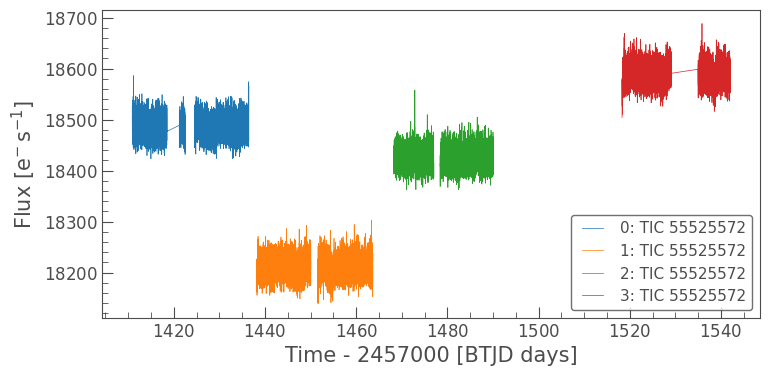

In [12]:
select_sectors = available_data_all[0:4]
lc_collection = select_sectors.download_all()
lc_collection.plot()

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

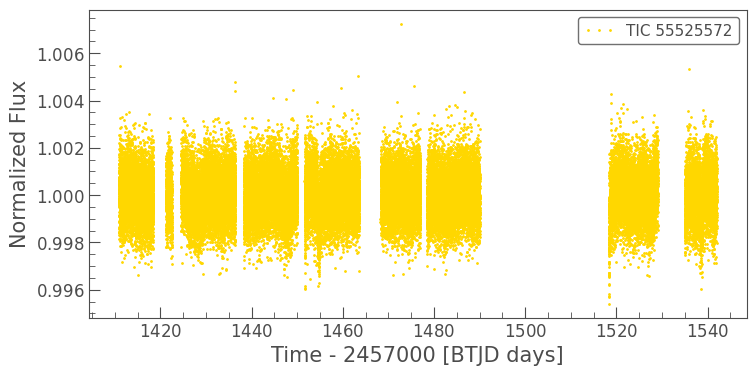

In [13]:
lc_collection_stitched = lc_collection.stitch()
lc_collection_stitched.plot(color = 'gold', lw = 0, marker = '.')

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

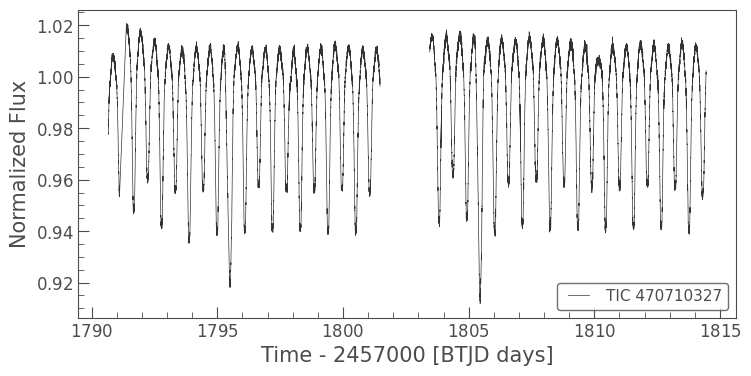

In [14]:
lc_normalize = lc.normalize()
lc_normalize.plot()

In [15]:
available_data_select = lk.search_lightcurve(TIC_2, author = 'SPOC')[0:9] # Search the available data, selecting all data from first year of TESS data sectors
lc_collection = available_data_select.download_all().stitch() # Download the selected data, stitching the data from the different sectors together

# Define the orbital period & time of first transit event (T0)
period = 83.8979
t0 = 2125.847 # date on ExoFOP

# Phase fold the light curve
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

# Bin the lightcurve to 15 minutes
lc_phased_binned = lc_phased.bin(15/24/60)

(0.996, 1.004)

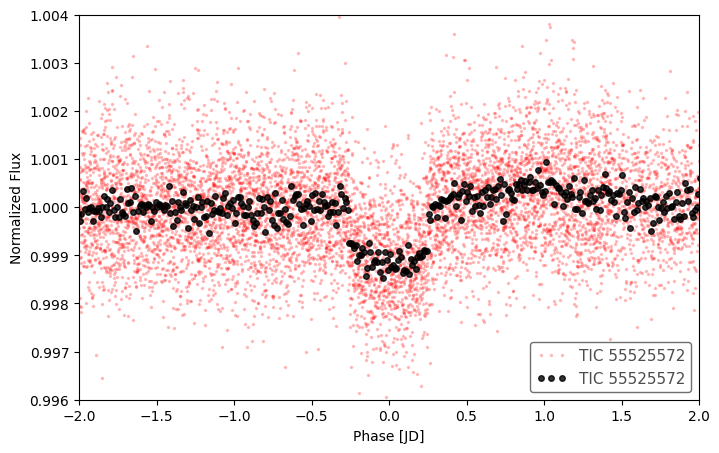

In [17]:
import matplotlib.pyplot as plt

# Plot the binned and unbinned phase folded lightcurve on the same figure
fig, ax = plt.subplots(figsize = (8,5))
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 3)
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'k', alpha = 0.8, markersize = 4)

plt.xlim(-2, 2)
plt.ylim(0.996, 1.004)